# Data-Prep: CRM Data

# Load libs

In [1]:

# make imports from pa_lib possible (parent directory of file's directory)
import sys
from pathlib import Path

file_dir = Path.cwd()
parent_dir = file_dir.parent
sys.path.append(str(parent_dir))

import pandas as pd
pd.options.display.max_columns = None


## Libraries & Settings ##
from pa_lib.file import load_bin
from pa_lib.util import cap_words
from pa_lib.log import time_log, info

import datetime as dt
from dateutil.relativedelta import relativedelta

from pa_lib.data import (
    clean_up_categoricals,
    unfactorize,
)

from pa_lib.data import desc_col

In [24]:
from pa_lib.data import boxplot_histogram
import numpy as np


# Load CRM data

In [2]:
def load_crm_data():
    raw_data = load_bin("vkprog\\crm_data_vkprog.feather").rename(
        mapper=lambda name: cap_words(name, sep="_"), axis="columns"
    )
    return raw_data


In [3]:
raw_crm_data = load_crm_data()

2019-10-07 13:02:59 [INFO] Started loading binary file
2019-10-07 13:02:59 [INFO] Reading from file C:\Users\stc\data\vkprog\crm_data_vkprog.feather
2019-10-07 13:02:59 [INFO] Finished loading binary file in 0.57s (0.36s CPU)


In [4]:
raw_crm_data = raw_crm_data.astype({"Year": "int64", "KW_2": "int64"})

In [5]:
raw_crm_data.eval("YYYYKW_2 = Year * 100 + KW_2", inplace=True)

# View data

In [6]:
display(raw_crm_data.head())
display(raw_crm_data.describe())
display(desc_col(raw_crm_data))

,Betreff,Kanal,Datum,Quelle,Verantwortlich,Kuerzel,Endkunde_NR,VB_Filter_Von,VB_Filter_Bis,VB_Filter_Grund,Year,KW,KW_2,KW_4,YYYYKW_2
0,Ost - Aktionen - 2014 - ACO F200 Leuchtplakate...,E-Mail,2014-10-08,Marketing,Liliane Schüpbach (REGION OST ZÜRICH),LSC,100034,NaT,NaT,NaN,2014,41,41,41,201441
1,City ePanel Winterthur,Besuch,2014-11-03,Verkauf,Alma Coralic (REGION OST ZÜRICH),ACO,100034,NaT,NaT,NaN,2014,45,45,45,201445
2,KMU Forum,Besuch,2014-11-27,Verkauf,Heinz Kläui (APG WINTERTHUR),HKL,100034,NaT,NaT,NaN,2014,48,47,45,201447
3,Ost - Aktionen - 2015 - ACO_KMU Aktion_KW5-7_2015,E-Mail,2014-12-11,Marketing,Larissa Zingre (KAM ZÜRICH),LKU,100034,NaT,NaT,NaN,2014,50,49,49,201449
4,Cafe,Besuch,2014-12-23,Verkauf,Heinz Kläui (APG WINTERTHUR),HKL,100034,NaT,NaT,NaN,2014,52,51,49,201451


,Year,KW_2,YYYYKW_2
count,904403.000000,904403.000000,904403.000000
mean,2016.555787,25.974495,201681.553147
std,1.636505,14.913925,160.712220
min,2013.000000,1.000000,201339.000000
25%,2015.000000,13.000000,201543.000000
50%,2017.000000,25.000000,201707.000000
75%,2018.000000,39.000000,201819.000000
max,2024.000000,51.000000,202441.000000


,DTYPE,NULLS,UNIQUE
Betreff,category,22/904381,259652
Kanal,category,0/904403,12
Datum,datetime64[ns],0/904403,2249
Quelle,category,0/904403,3
Verantwortlich,category,0/904403,270
Kuerzel,category,1/904402,272
Endkunde_NR,category,0/904403,48517
VB_Filter_Von,datetime64[ns],903007/1396,13
VB_Filter_Bis,datetime64[ns],903369/1034,37
VB_Filter_Grund,category,903021/1382,60


In [7]:
display(raw_crm_data.groupby(["Year","Kanal"]).count().loc[:,"Endkunde_NR"])

Year  Kanal        
2013  Besprechung         91.0
      Besuch            2546.0
      Brief             2924.0
      Dankeskarte          NaN
      E-Mail           17177.0
      Event               54.0
      Fax                  NaN
      Internet            23.0
      SMS                  1.0
      Telefon            970.0
      Twitter              NaN
      Veranstaltung        NaN
2014  Besprechung        171.0
      Besuch           10941.0
      Brief             7512.0
      Dankeskarte         68.0
      E-Mail           73949.0
      Event              223.0
      Fax                  1.0
      Internet            85.0
      SMS                  8.0
      Telefon           4942.0
      Twitter              2.0
      Veranstaltung      238.0
2015  Besprechung        179.0
      Besuch           11944.0
      Brief             3664.0
      Dankeskarte         76.0
      E-Mail           97372.0
      Event               99.0
                        ...   
2022  Fax          

In [8]:
raw_crm_data.query("Year == 2019")

,Betreff,Kanal,Datum,Quelle,Verantwortlich,Kuerzel,Endkunde_NR,VB_Filter_Von,VB_Filter_Bis,VB_Filter_Grund,Year,KW,KW_2,KW_4,YYYYKW_2
47,MegaPoster Newsletter - Newsletter Gerbergasse...,E-Mail,2019-01-15,Marketing,Lara Hösli (KAM ZÜRICH),LAH,100034,NaT,NaT,NaN,2019,3,3,1,201903
48,Ost - Aktionen 2019 - ACO_Dispo_Eröffnung 2. H...,E-Mail,2019-02-18,Marketing,Ivonne Wipfli (REGION OST ZÜRICH),IWI,100034,NaT,NaT,NaN,2019,8,7,5,201907
49,MegaPoster Newsletter - Last-minute-Angebot AP...,E-Mail,2019-03-06,Marketing,Lara Hösli (KAM ZÜRICH),LAH,100034,NaT,NaT,NaN,2019,10,9,9,201909
50,MegaPoster Newsletter - neues MegaPoster Basel...,E-Mail,2019-04-03,Marketing,Lara Hösli (KAM ZÜRICH),LAH,100034,NaT,NaT,NaN,2019,14,13,13,201913
51,MegaPoster Newsletter - neues MegaPoster Lande...,E-Mail,2019-04-10,Marketing,Lara Hösli (KAM ZÜRICH),LAH,100034,NaT,NaT,NaN,2019,15,15,13,201915
52,MegaPoster Newsletter - Sommer-Special zu gesc...,E-Mail,2019-04-25,Marketing,Lara Hösli (KAM ZÜRICH),LAH,100034,NaT,NaT,NaN,2019,17,17,17,201917
53,Ost - Aktionen 2019 - ACO_Sommeraktion_KW28-32...,E-Mail,2019-05-24,Marketing,Ivonne Wipfli (REGION OST ZÜRICH),IWI,100034,NaT,NaT,NaN,2019,21,21,21,201921
54,Ost - Aktionen 2019 - REMINDER ACO_Sommeraktio...,E-Mail,2019-06-12,Marketing,Ivonne Wipfli (REGION OST ZÜRICH),IWI,100034,NaT,NaT,NaN,2019,24,23,21,201923
55,MegaPoster Newsletter - Newsletter Börsenstras...,E-Mail,2019-06-20,Marketing,Lara Hösli (KAM ZÜRICH),LAH,100034,NaT,NaT,NaN,2019,25,25,25,201925
56,MegaPoster Newsletter - Newsletter Hardstrasse...,E-Mail,2019-07-23,Marketing,Lara Hösli (KAM ZÜRICH),LAH,100034,NaT,NaT,NaN,2019,30,29,29,201929


In [9]:
display(raw_crm_data.pivot_table(
    index=["Kanal"],
    columns=["Year"],
    values=["Endkunde_NR"],
    aggfunc="count",
    fill_value=0)
)

Endkunde_NR                                                     \
Year                 2013   2014   2015    2016    2017    2018    2019 2020   
Kanal                                                                          
Besprechung            91    171    179     749     547     213     116    0   
Besuch               2546  10941  11944   12302   11974   10922    7830   51   
Brief                2924   7512   3664    6305    3371    3873    2383    0   
Dankeskarte             0     68     76      82      77      72      44    0   
E-Mail              17177  73949  97372  158107  147074  158915  103440    1   
Event                  54    223     99     674     848     601       0    0   
Fax                     0      1      1       4       5       2       0    0   
Internet               23     85     99     112     127      88      73    0   
SMS                     1      8      6      17      10       8       5    0   
Telefon               970   4942   9424    7388    7644    8117    4577   17   
Twitter                 0      2      0       0       0       0       0    0   
Veranstaltung           0    238    375     200      84     116      68    0   

                                   
Year          2021 2022 2023 2024  
Kanal                              
Besprechung      0    0    0    0  
Besuch           0    0    1    0  
Brief            0    0    0    0  
Dankeskarte      0    0    0    0  
E-Mail           1    1    1    1  
Event            0    0    0    0  
Fax              0    0    0    0  
Internet         0    0    0    0  
SMS              0    0    0    0  
Telefon          0    0    0    0  
Twitter          0    0    0    0  
Veranstaltung    0    0    0    0

# Define Groups

In [10]:
from functools import reduce

all_kanal =set(raw_crm_data.loc[:,"Kanal"])
kanal_grps = {}

kanal_grps["Besprechung"]         = {"Besprechung"}
kanal_grps["Besuch"]              = {"Besuch"}
kanal_grps["Brief_Dankeskarte"]   = {"Brief","Dankeskarte"}
kanal_grps["E-Mail"]              = {"E-Mail"}
kanal_grps["Event_Veranstaltung"] = {"Event","Veranstaltung"}
kanal_grps["Telefon"]             = {"Telefon"}

# Stuff all the rest into "Anderes":
kanal_grps["Anderes"]             =  all_kanal - reduce(set.union,kanal_grps.values())  

In [172]:
#Check
kanal_grps

{'Besprechung': {'Besprechung'},
 'Besuch': {'Besuch'},
 'Brief_Dankeskarte': {'Brief', 'Dankeskarte'},
 'E-Mail': {'E-Mail'},
 'Event_Veranstaltung': {'Event', 'Veranstaltung'},
 'Telefon': {'Telefon'},
 'Anderes': {'Fax', 'Internet', 'SMS', 'Twitter'}}

# Global variables

In [13]:
def global_variables(day, month, year_score, year_train, year_span):
    global date_now, date_training
    
    date_now      = dt.datetime(year_score,month,day) # only works for odd calendar weeks!!!
    date_training = dt.datetime(year_train,month,day) # only works for odd calendar weeks!!!
    
    return f"date_now: {date_now} -- date_training: {date_training})"
    

In [14]:
global_variables(day=23,
    month=9,
    year_score=2019,
    year_train=2018,
    year_span=4)

'date_now: 2019-09-23 00:00:00 -- date_training: 2018-09-23 00:00:00)'

In [15]:
year_span = 4
print(date_now)
print(date_training)
print(year_span)

2019-09-23 00:00:00
2018-09-23 00:00:00
4


# Yearly aggregation per Kanal group element

In [19]:
def contacts_grouped_yrly(date_view,kanal_grps,year_span):
    ####
    def yrl_kanal_contacts(date_view, group_name, rel_year):
        return (raw_crm_data.loc[(raw_crm_data.loc[:,"Kanal"].isin(kanal_grps[group_name]) &     # adjust to key
                         (raw_crm_data.loc[:,"Datum"] <  date_view  - relativedelta(years= rel_year   )) &
                         (raw_crm_data.loc[:,"Datum"] >= date_view  - relativedelta(years= rel_year+1 )) # adjust years
                         ),:]
                    .groupby("Endkunde_NR").count()
                    .reset_index(inplace=False)
                    .loc[:,["Endkunde_NR","Kanal"]]
                    .rename(columns={"Kanal": f"RY_{rel_year}_Anz_{group_name}"})   # adjust "Anzahl"
                    #.sort_values("Anzahl", ascending=False)
               )
    #####
    container_df = yrl_kanal_contacts(date_view=date_view,
                                      group_name=list(kanal_grps.keys())[1],rel_year=0).loc[:,"Endkunde_NR"]
    for name in kanal_grps.keys():
        for i in range(year_span):
            rel = yrl_kanal_contacts(date_view=date_view,
                                     group_name=name,
                                     rel_year=i)
            container_df = pd.merge(container_df,
                                    rel,
                                    on="Endkunde_NR",
                                    how="inner")
    return container_df

In [20]:
#apply function:

derpstown_df = contacts_grouped_yrly(date_view=date_training,
                      kanal_grps=kanal_grps,
                      year_span=year_span)


In [174]:
display(derpstown_df.head())
display(derpstown_df.describe())
display(desc_col(derpstown_df))
print(derpstown_df.shape)

,Endkunde_NR,RY_0_Anz_Besprechung,RY_1_Anz_Besprechung,RY_2_Anz_Besprechung,RY_3_Anz_Besprechung,RY_0_Anz_Besuch,RY_1_Anz_Besuch,RY_2_Anz_Besuch,RY_3_Anz_Besuch,RY_0_Anz_Brief_Dankeskarte,RY_1_Anz_Brief_Dankeskarte,RY_2_Anz_Brief_Dankeskarte,RY_3_Anz_Brief_Dankeskarte,RY_0_Anz_E-Mail,RY_1_Anz_E-Mail,RY_2_Anz_E-Mail,RY_3_Anz_E-Mail,RY_0_Anz_Event_Veranstaltung,RY_1_Anz_Event_Veranstaltung,RY_2_Anz_Event_Veranstaltung,RY_3_Anz_Event_Veranstaltung,RY_0_Anz_Telefon,RY_1_Anz_Telefon,RY_2_Anz_Telefon,RY_3_Anz_Telefon,RY_0_Anz_Anderes,RY_1_Anz_Anderes,RY_2_Anz_Anderes,RY_3_Anz_Anderes
0,100034,0,0,0,0,0,0,2,5,0,0,1,0,16,6,9,7,0,0,0,0,0,0,0,0,0,0,0,0
1,100039,0,0,0,0,1,0,0,0,0,0,0,0,8,9,11,1,0,0,0,0,1,1,0,0,0,0,0,0
2,100043,0,0,0,0,0,0,0,0,0,0,0,0,0,5,12,8,0,0,0,0,0,0,0,0,0,0,0,0
3,100045,0,0,0,0,0,1,0,0,1,0,1,0,11,8,9,6,2,0,0,0,0,1,0,0,0,0,0,0
4,100048,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,1,0,0,0,0,0,0,0,0,0,0,0,0


,RY_0_Anz_Besprechung,RY_1_Anz_Besprechung,RY_2_Anz_Besprechung,RY_3_Anz_Besprechung,RY_0_Anz_Besuch,RY_1_Anz_Besuch,RY_2_Anz_Besuch,RY_3_Anz_Besuch,RY_0_Anz_Brief_Dankeskarte,RY_1_Anz_Brief_Dankeskarte,RY_2_Anz_Brief_Dankeskarte,RY_3_Anz_Brief_Dankeskarte,RY_0_Anz_E-Mail,RY_1_Anz_E-Mail,RY_2_Anz_E-Mail,RY_3_Anz_E-Mail,RY_0_Anz_Event_Veranstaltung,RY_1_Anz_Event_Veranstaltung,RY_2_Anz_Event_Veranstaltung,RY_3_Anz_Event_Veranstaltung,RY_0_Anz_Telefon,RY_1_Anz_Telefon,RY_2_Anz_Telefon,RY_3_Anz_Telefon,RY_0_Anz_Anderes,RY_1_Anz_Anderes,RY_2_Anz_Anderes,RY_3_Anz_Anderes
count,51467.000000,51467.000000,51467.000000,51467.000000,51467.000000,51467.000000,51467.000000,51467.000000,51467.000000,51467.000000,51467.000000,51467.000000,51467.000000,51467.000000,51467.000000,51467.000000,51467.000000,51467.000000,51467.000000,51467.000000,51467.000000,51467.000000,51467.000000,51467.000000,51467.000000,51467.000000,51467.00000,51467.000000
mean,0.004488,0.014961,0.010725,0.002234,0.214506,0.231974,0.238191,0.226961,0.055123,0.076321,0.129403,0.091029,3.386306,3.074591,2.679270,1.787048,0.026930,0.016613,0.006742,0.008977,0.159287,0.151689,0.140673,0.162084,0.001904,0.003109,0.00204,0.002370
std,0.114943,0.313447,0.203918,0.076188,1.010917,1.079150,1.133160,0.995676,0.300022,0.392439,0.463785,0.514065,7.645809,8.179426,6.719503,5.380689,0.208376,0.154267,0.140687,0.141045,0.666293,0.857177,0.809936,0.868360,0.075041,0.122594,0.08579,0.139651
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,11.000000,23.000000,16.000000,9.000000,78.000000,66.000000,74.000000,56.000000,7.000000,7.000000,15.000000,13.000000,668.000000,1050.000000,929.000000,632.000000,6.000000,5.000000,14.000000,10.000000,50.000000,100.000000,51.000000,83.000000,7.000000,13.000000,12.00000,28.000000


,DTYPE,NULLS,UNIQUE
Endkunde_NR,category,0/51467,51467
RY_0_Anz_Besprechung,int64,0/51467,10
RY_1_Anz_Besprechung,int64,0/51467,19
RY_2_Anz_Besprechung,int64,0/51467,13
RY_3_Anz_Besprechung,int64,0/51467,7
RY_0_Anz_Besuch,int64,0/51467,29
RY_1_Anz_Besuch,int64,0/51467,28
RY_2_Anz_Besuch,int64,0/51467,28
RY_3_Anz_Besuch,int64,0/51467,26
RY_0_Anz_Brief_Dankeskarte,int64,0/51467,8


(51467, 29)


RY_0_Anz_Besprechung :


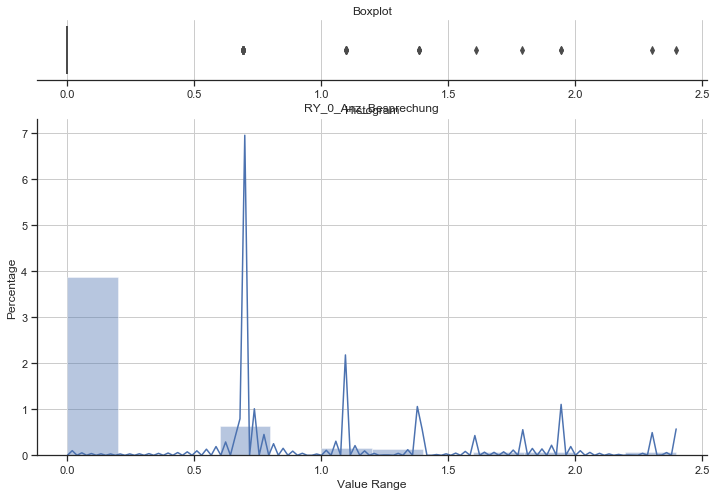

RY_1_Anz_Besprechung :


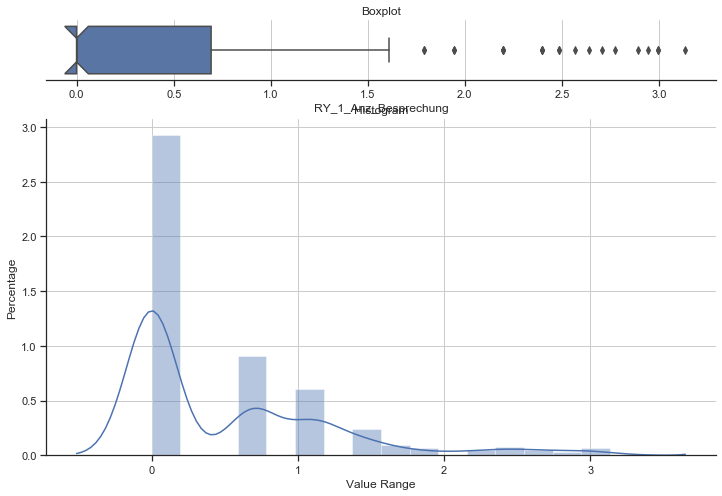

RY_2_Anz_Besprechung :


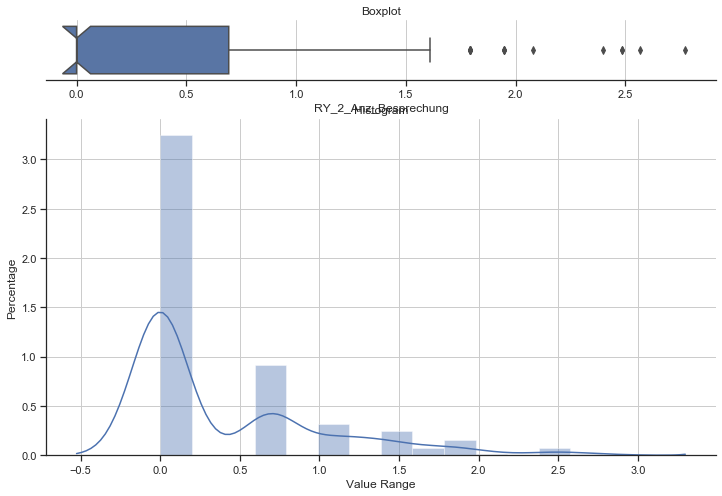

RY_3_Anz_Besprechung :


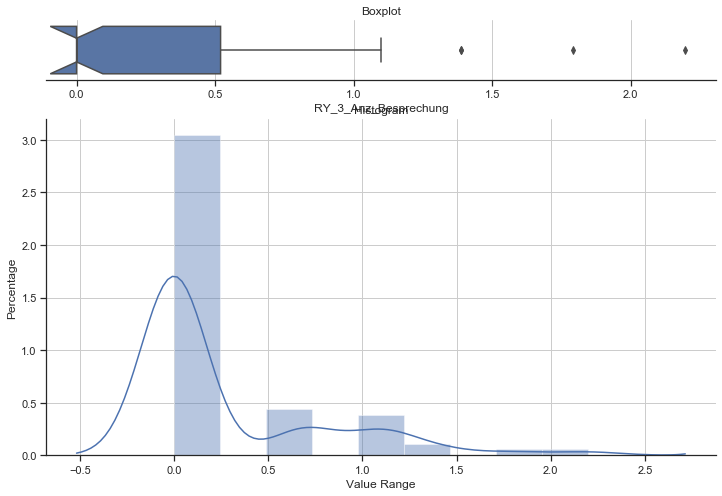

RY_0_Anz_Besuch :


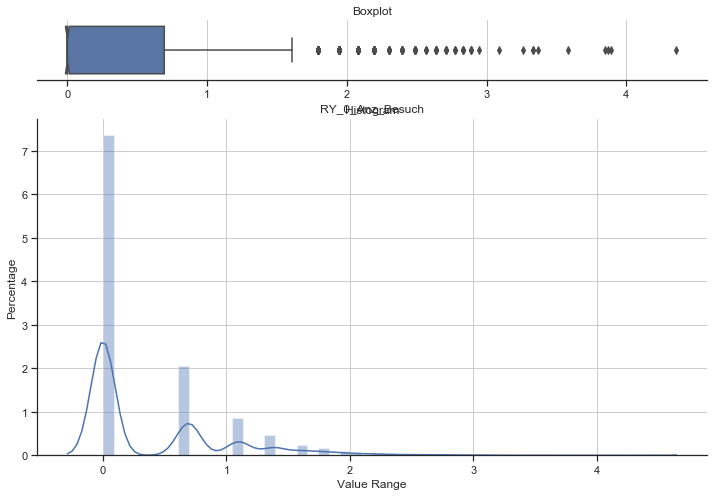

RY_1_Anz_Besuch :


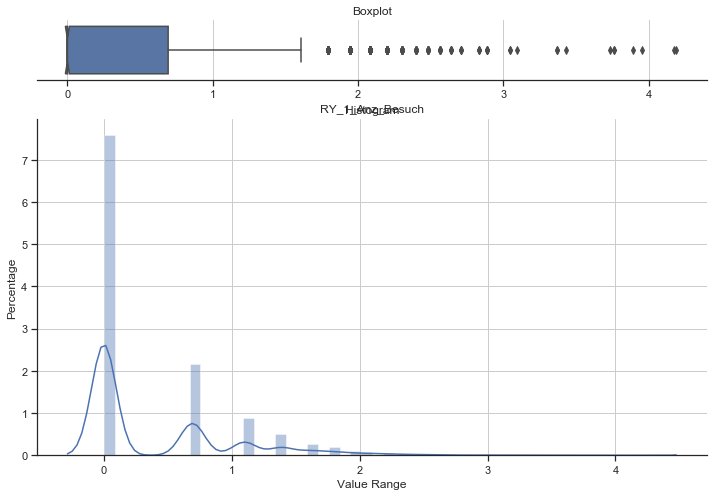

RY_2_Anz_Besuch :


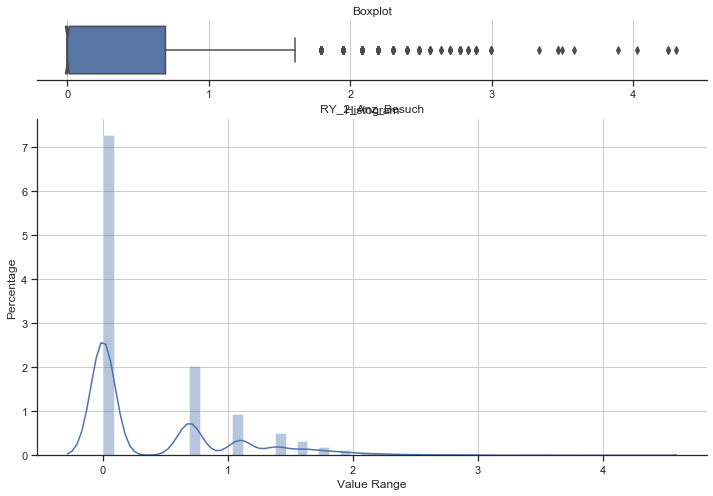

RY_3_Anz_Besuch :


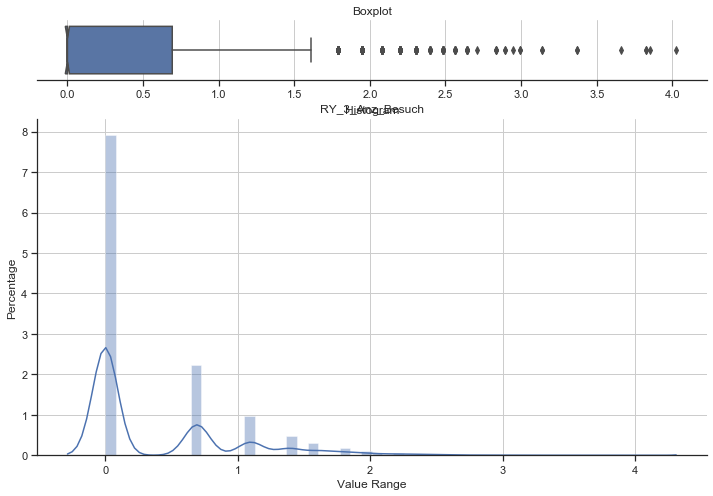

RY_0_Anz_Brief_Dankeskarte :


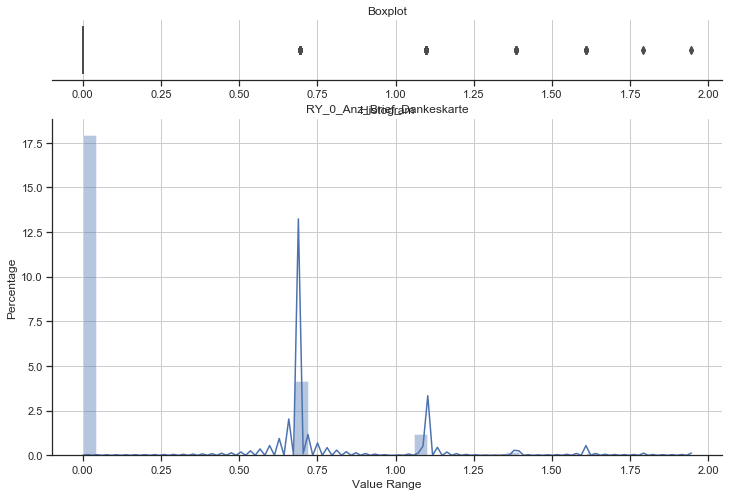

RY_1_Anz_Brief_Dankeskarte :


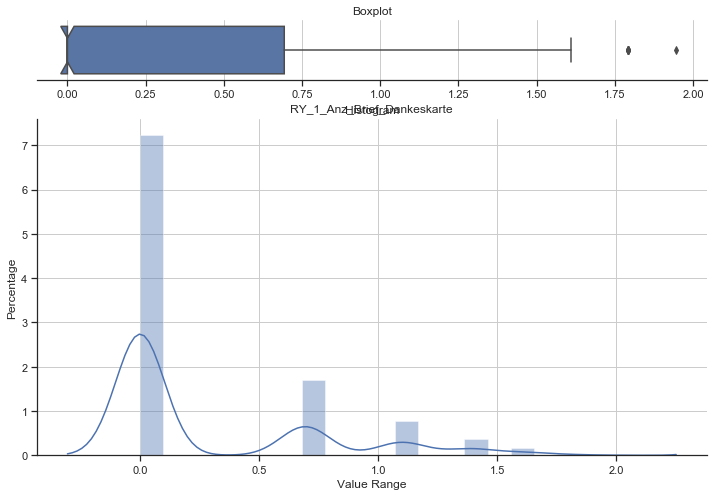

RY_2_Anz_Brief_Dankeskarte :


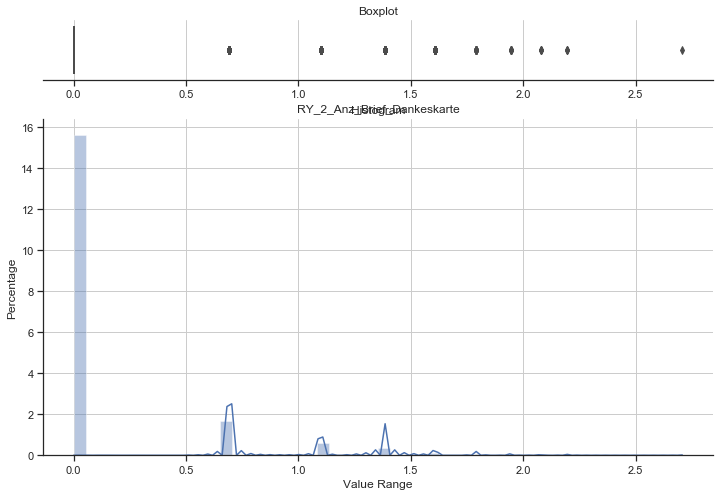

RY_3_Anz_Brief_Dankeskarte :


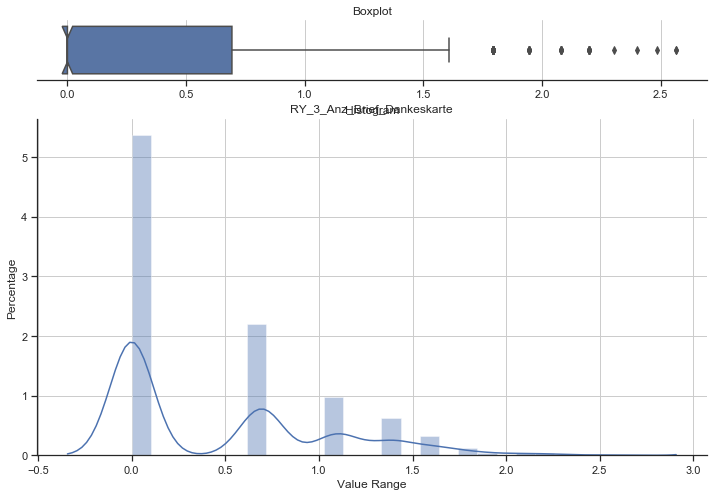

RY_0_Anz_E-Mail :


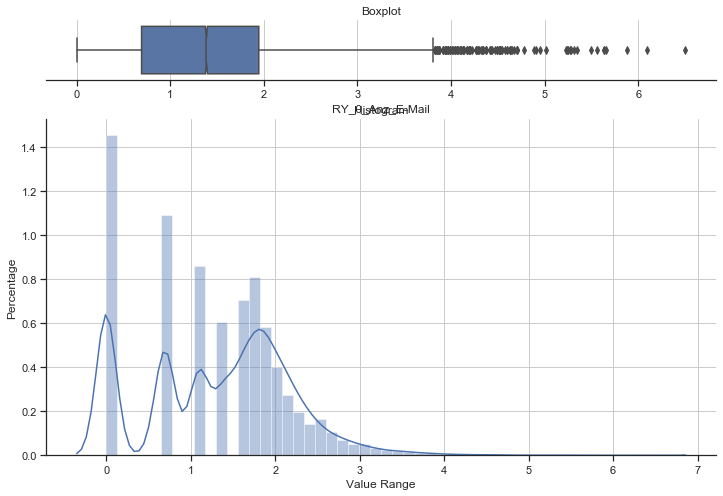

RY_1_Anz_E-Mail :


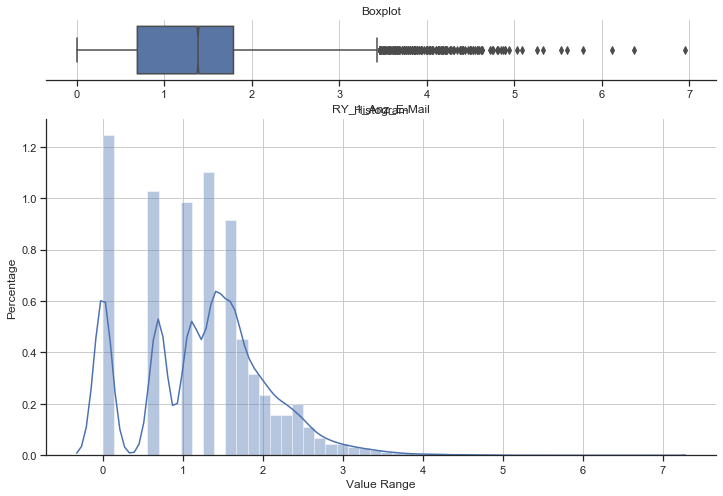

RY_2_Anz_E-Mail :


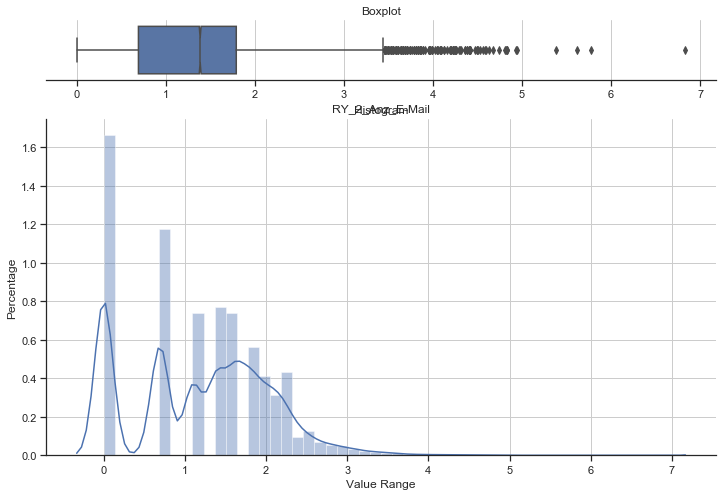

RY_3_Anz_E-Mail :


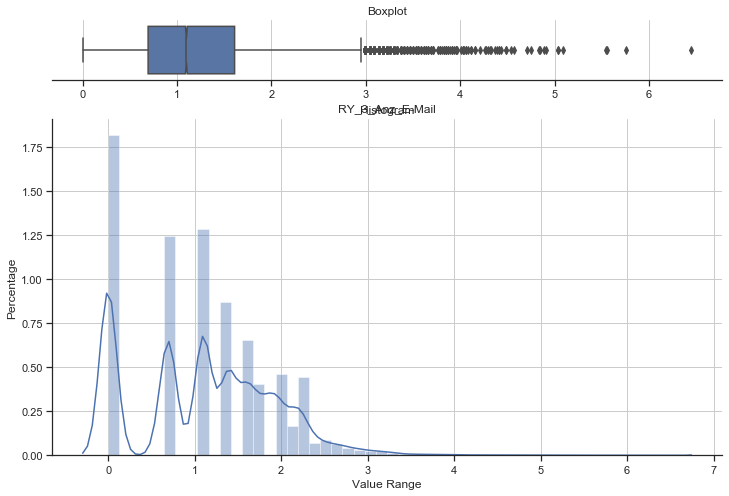

RY_0_Anz_Event_Veranstaltung :


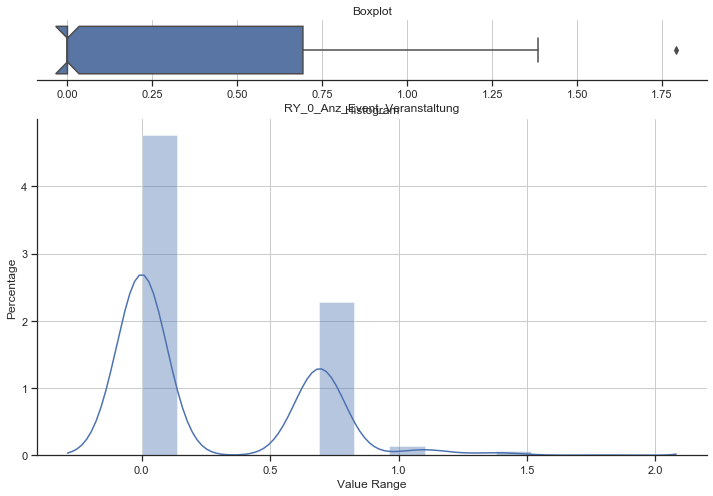

RY_1_Anz_Event_Veranstaltung :


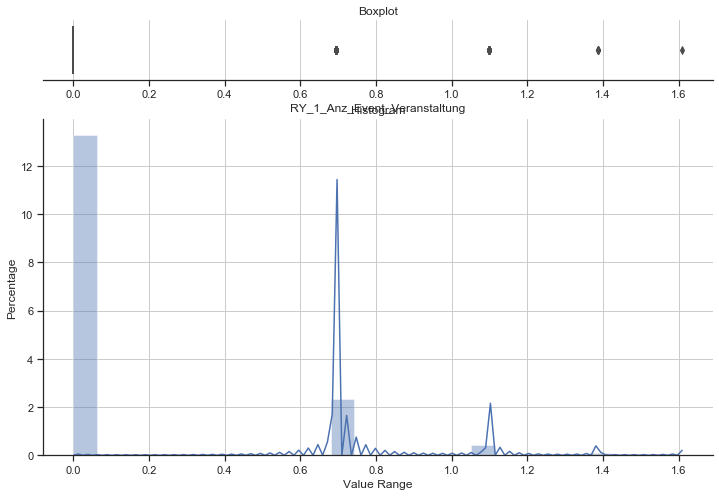

RY_2_Anz_Event_Veranstaltung :


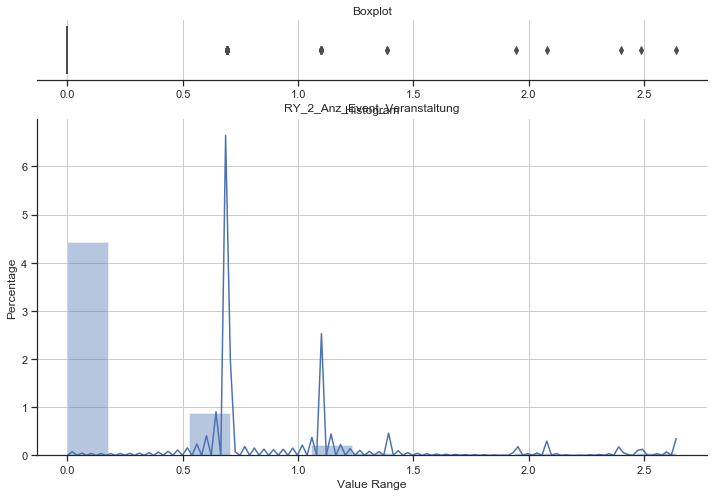

RY_3_Anz_Event_Veranstaltung :


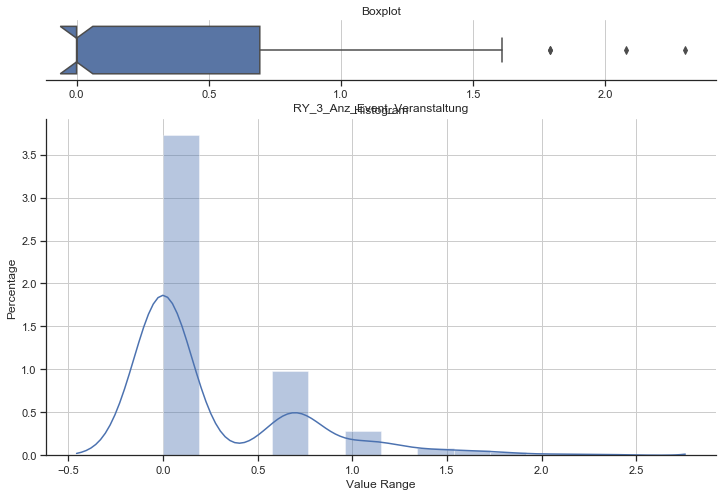

RY_0_Anz_Telefon :


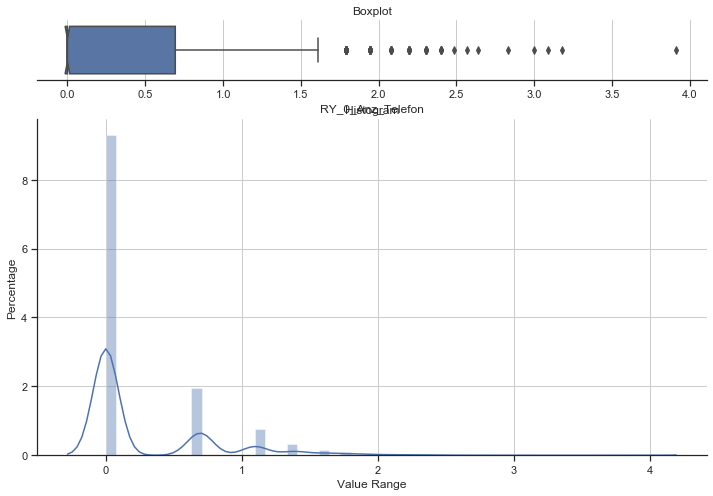

RY_1_Anz_Telefon :


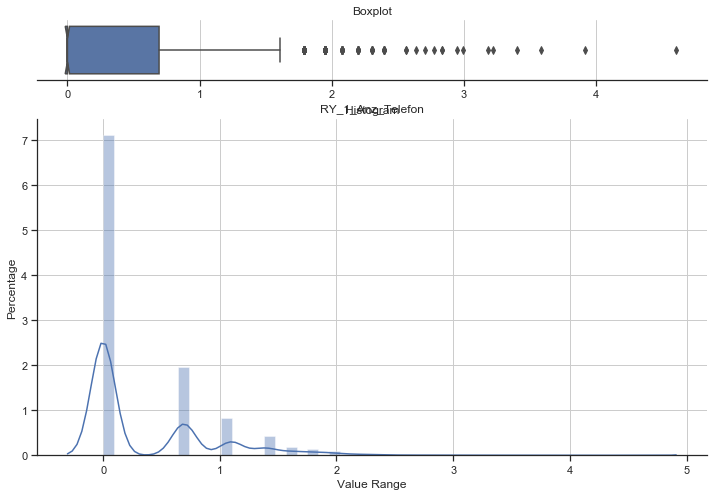

RY_2_Anz_Telefon :


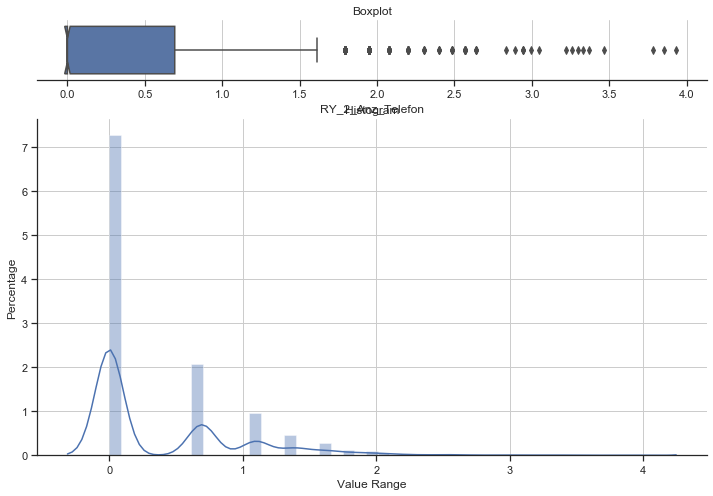

RY_3_Anz_Telefon :


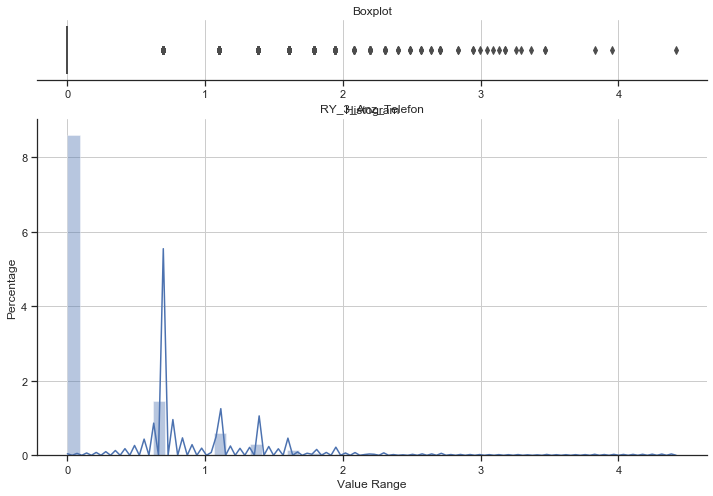

RY_0_Anz_Anderes :


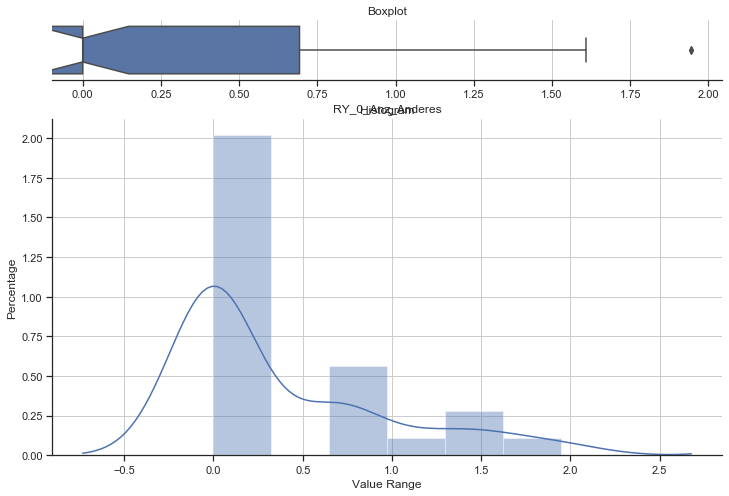

RY_1_Anz_Anderes :


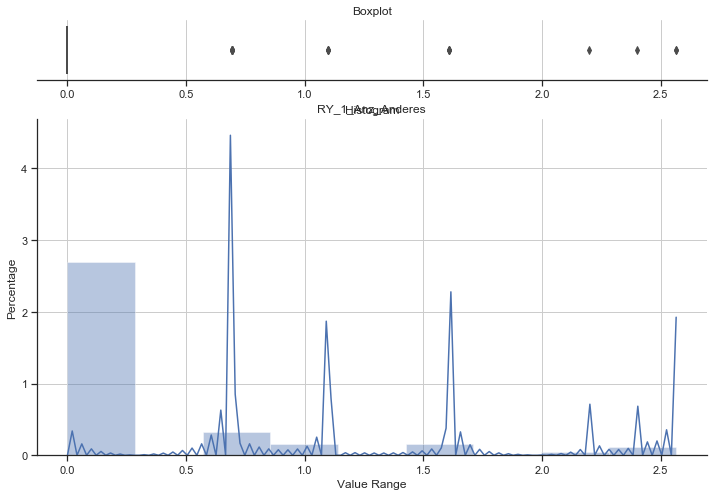

RY_2_Anz_Anderes :


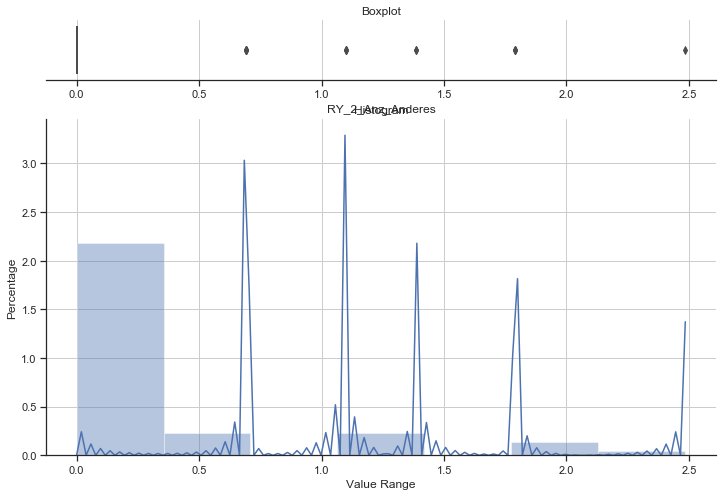

RY_3_Anz_Anderes :


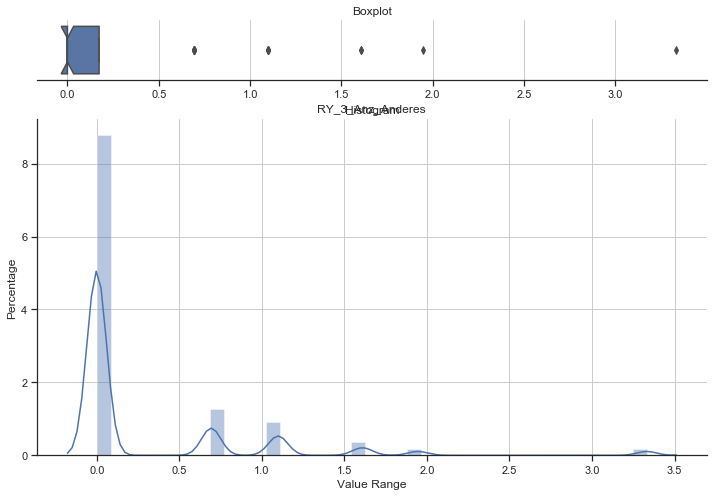

In [28]:
for blah in list(derpstown_df.columns)[1:]:
    print(blah,":")
    boxplot_histogram(np.log(derpstown_df.loc[derpstown_df.loc[:,blah] > 0, blah]),
                      figsize=(12,8)
                     )

## Delta(view_date, last_contact)

In [164]:
def delta_contact(date_view,kanal_grps):
    for name in kanal_grps.keys():
        raw_crm_data.loc[raw_crm_data.Kanal.isin(kanal_grps[name]), "Kanal_Grps"] = name
    
    max_vertical_df = (raw_crm_data.loc[(raw_crm_data.loc[:,"Datum"] <  date_view) # adjust years
                     ,:]
                .groupby(["Endkunde_NR", "Kanal_Grps"])
                .agg({"Datum": np.max})
                .reset_index(inplace=False)
                   )
    max_vertical_df["delta_days"] = (date_now - max_vertical_df.loc[:,"Datum"]).apply(lambda x: x.total_seconds()) / 86400  # delta in days
    
    flatten_df = max_vertical_df.pivot_table(
        index   = "Endkunde_NR",
        columns = ["Kanal_Grps"],
        values  = ["delta_days"],
        aggfunc = "min").reset_index(inplace=False)
    
    flatten_df  = pd.DataFrame(flatten_df.to_records(index=False))
    flatten_df.columns = ["Endkunde_NR"]+[ "Letzter_Kontakt_Delta_"+x.replace("'","").replace("(","").replace("delta_days, ","").replace(",","").replace(" ","").replace(")","") for x in flatten_df.columns[1:]]
    
    flatten_df["Letzter_Kontakt_Delta_global"] = flatten_df.iloc[:,1:].min(axis = 1, skipna = True)
    
    #Letzte_Buchung_Delta
    
    return flatten_df

In [166]:
delta_contacts_df = delta_contact(date_view=date_now, kanal_grps=kanal_grps)

In [167]:
delta_contacts_df.head()

,Endkunde_NR,Letzter_Kontakt_Delta_Anderes,Letzter_Kontakt_Delta_Besprechung,Letzter_Kontakt_Delta_Besuch,Letzter_Kontakt_Delta_Brief_Dankeskarte,Letzter_Kontakt_Delta_E-Mail,Letzter_Kontakt_Delta_Event_Veranstaltung,Letzter_Kontakt_Delta_Telefon,Letzter_Kontakt_Delta_global
0,100034,NaN,NaN,1295.0,1337.0,10.0,NaN,24.0,10.0
1,100039,NaN,NaN,495.0,NaN,6.0,NaN,671.0,6.0
2,100043,NaN,NaN,2070.0,NaN,927.0,NaN,NaN,927.0
3,100045,NaN,NaN,881.0,188.0,10.0,529.0,752.0,10.0
4,100048,NaN,NaN,NaN,NaN,739.0,NaN,NaN,739.0


In [169]:
desc_col(delta_contacts_df)

,DTYPE,NULLS,UNIQUE
Endkunde_NR,object,0/48368,48368
Letzter_Kontakt_Delta_Anderes,float64,48092/276,226
Letzter_Kontakt_Delta_Besprechung,float64,47597/771,520
Letzter_Kontakt_Delta_Besuch,float64,29430/18938,1641
Letzter_Kontakt_Delta_Brief_Dankeskarte,float64,36530/11838,811
Letzter_Kontakt_Delta_E-Mail,float64,3937/44431,1330
Letzter_Kontakt_Delta_Event_Veranstaltung,float64,46718/1650,301
Letzter_Kontakt_Delta_Telefon,float64,30922/17446,1466
Letzter_Kontakt_Delta_global,float64,0/48368,1473


Letzter_Kontakt_Delta_Anderes


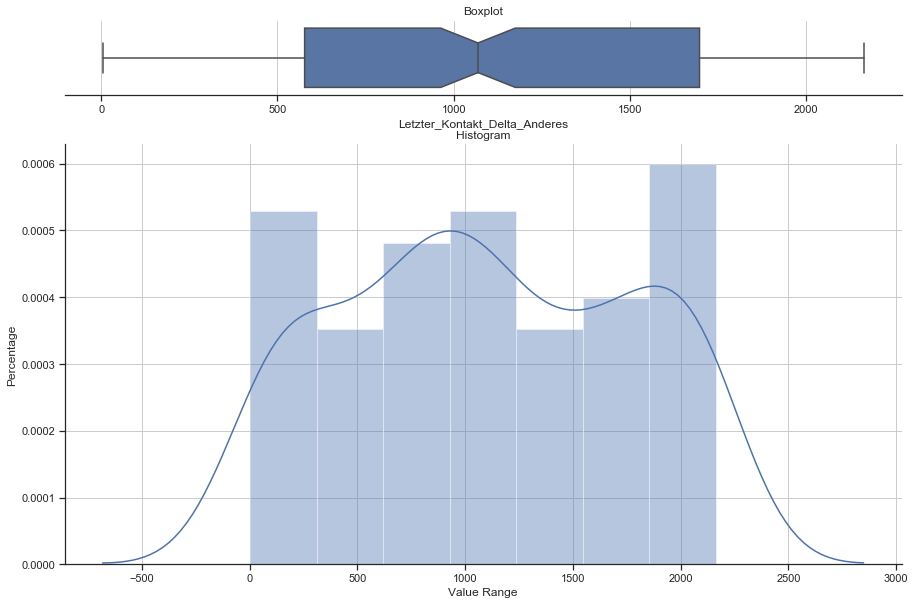

Letzter_Kontakt_Delta_Besprechung


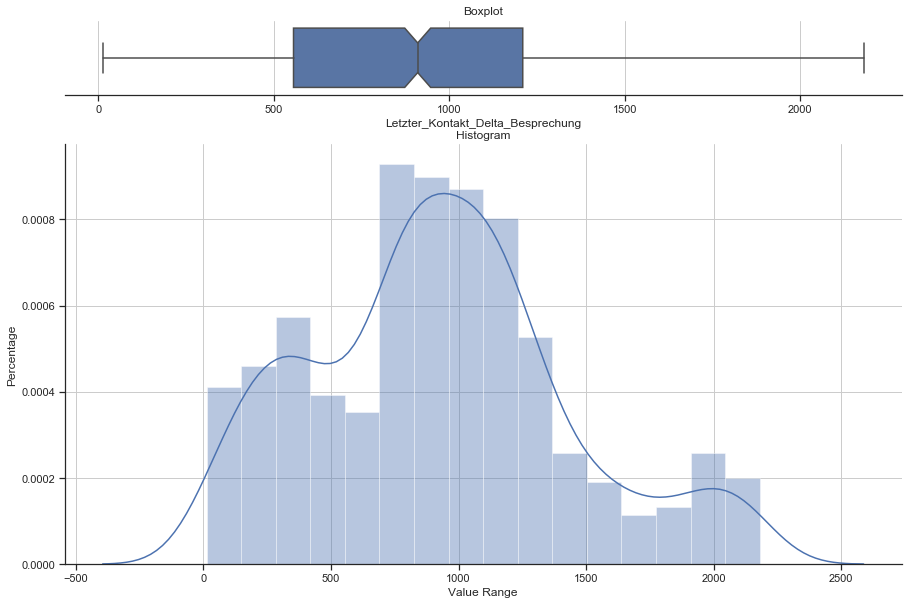

Letzter_Kontakt_Delta_Besuch


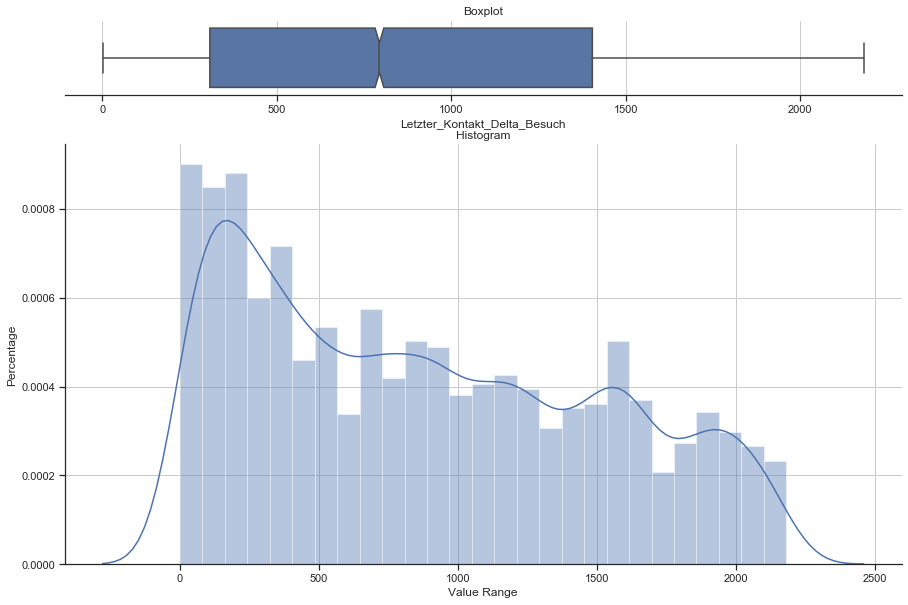

Letzter_Kontakt_Delta_Brief_Dankeskarte


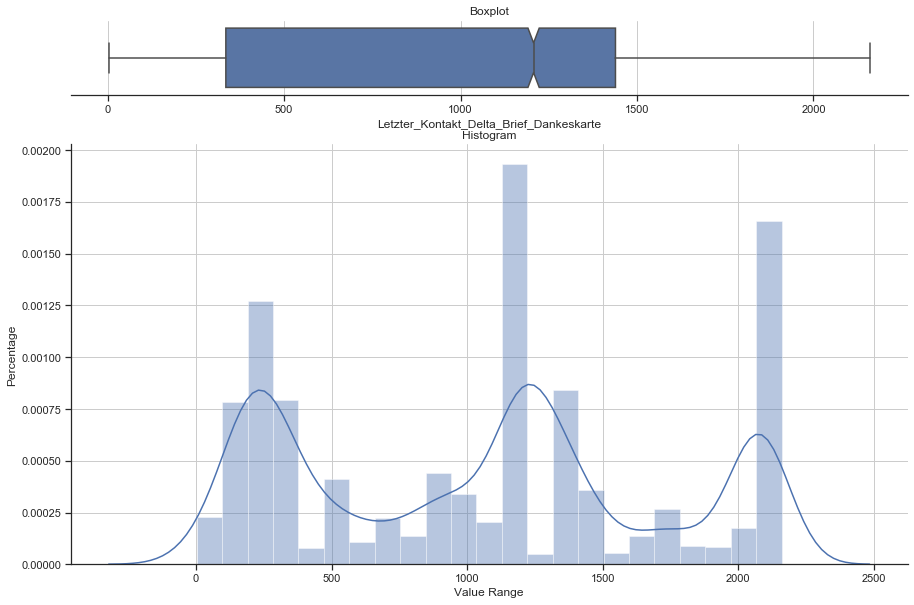

Letzter_Kontakt_Delta_E-Mail


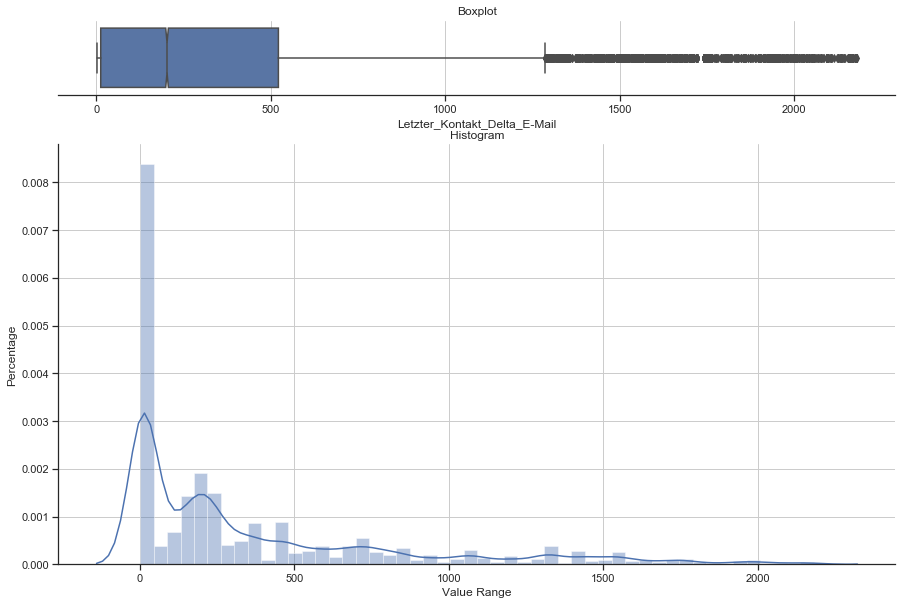

Letzter_Kontakt_Delta_Event_Veranstaltung


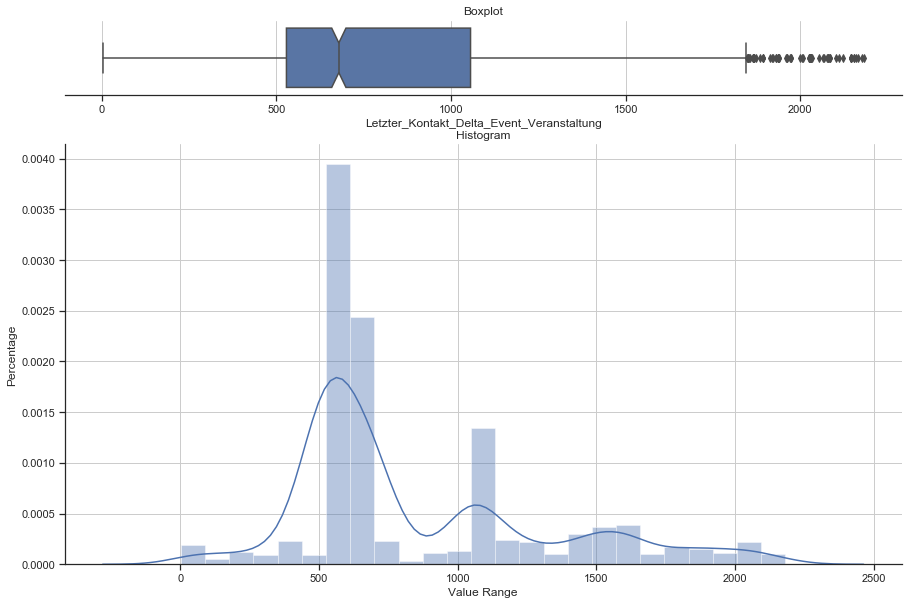

Letzter_Kontakt_Delta_Telefon


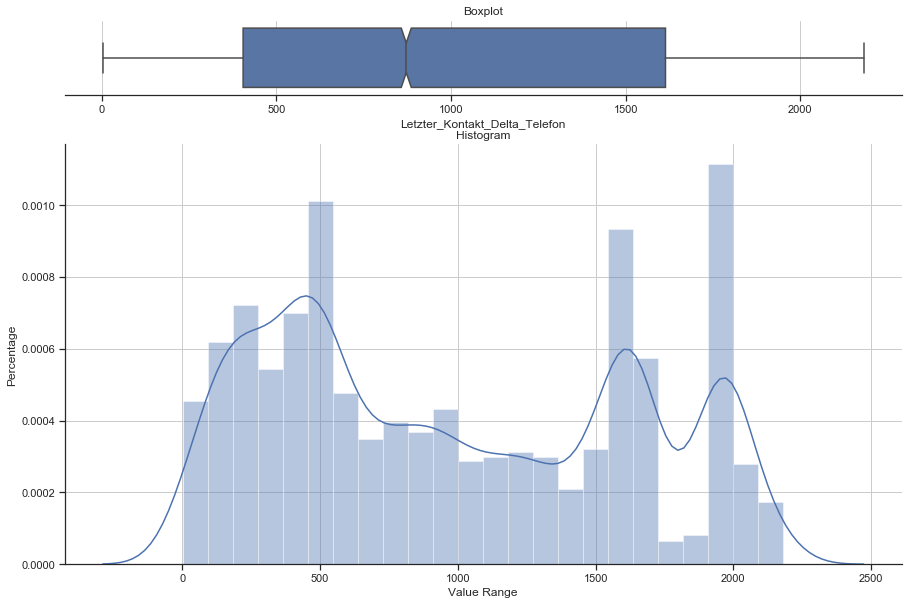

Letzter_Kontakt_Delta_global


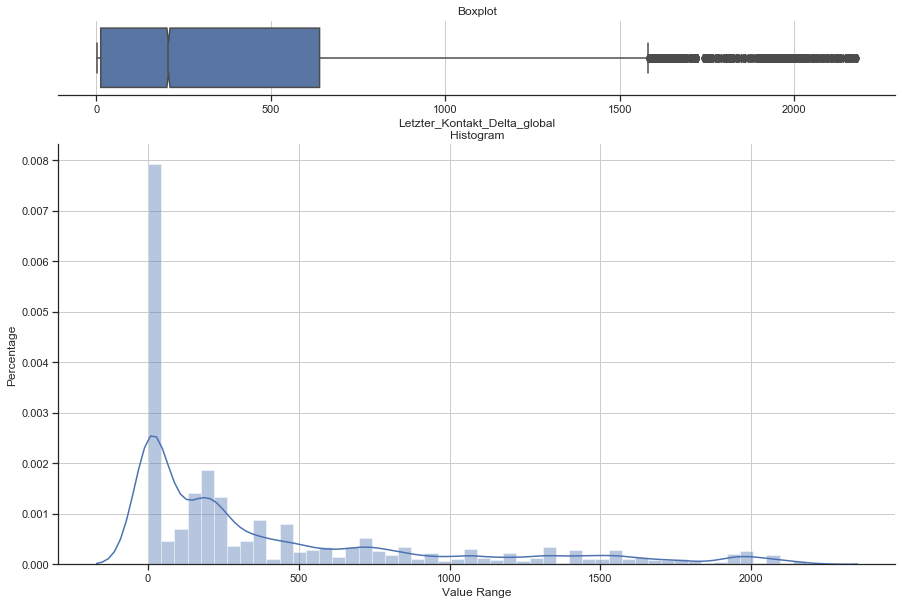

In [168]:
for name in delta_contacts_df.columns[1:]:
    print(name)
    boxplot_histogram(delta_contacts_df.loc[delta_contacts_df.loc[:,name] > 0, name])

In [124]:
raw_crm_data.head()

,Betreff,Kanal,Datum,Quelle,Verantwortlich,Kuerzel,Endkunde_NR,VB_Filter_Von,VB_Filter_Bis,VB_Filter_Grund,Year,KW,KW_2,KW_4,YYYYKW_2,Kanal_Grps
0,Ost - Aktionen - 2014 - ACO F200 Leuchtplakate...,E-Mail,2014-10-08,Marketing,Liliane Schüpbach (REGION OST ZÜRICH),LSC,100034,NaT,NaT,NaN,2014,41,41,41,201441,E-Mail
1,City ePanel Winterthur,Besuch,2014-11-03,Verkauf,Alma Coralic (REGION OST ZÜRICH),ACO,100034,NaT,NaT,NaN,2014,45,45,45,201445,Besuch
2,KMU Forum,Besuch,2014-11-27,Verkauf,Heinz Kläui (APG WINTERTHUR),HKL,100034,NaT,NaT,NaN,2014,48,47,45,201447,Besuch
3,Ost - Aktionen - 2015 - ACO_KMU Aktion_KW5-7_2015,E-Mail,2014-12-11,Marketing,Larissa Zingre (KAM ZÜRICH),LKU,100034,NaT,NaT,NaN,2014,50,49,49,201449,E-Mail
4,Cafe,Besuch,2014-12-23,Verkauf,Heinz Kläui (APG WINTERTHUR),HKL,100034,NaT,NaT,NaN,2014,52,51,49,201451,Besuch


In [79]:
np.isnat(np.datetime64("NaT"))

True

In [184]:
set(delta_contacts_df.loc[:,"Endkunde_NR"]) - set(derpstown_df.loc[:,"Endkunde_NR"])

set()

In [185]:
set(derpstown_df.loc[:,"Endkunde_NR"]) - set(delta_contacts_df.loc[:,"Endkunde_NR"])

{'115275',
 '501035',
 '512732',
 '515505',
 '520279',
 '522331',
 '556482',
 '130866',
 '536839',
 '542131',
 '482508',
 '129904',
 '502525',
 '549257',
 '519835',
 '512806',
 '511449',
 '467717',
 '493259',
 '534352',
 '495190',
 '555900',
 '133543',
 '514699',
 '516582',
 '575312',
 '535605',
 '507857',
 '487480',
 '560012',
 '107643',
 '494795',
 '544516',
 '577608',
 '547826',
 '490894',
 '659596',
 '111011',
 '590029',
 '506787',
 '516756',
 '108911',
 '465027',
 '516998',
 '135692',
 '157475',
 '549199',
 '487724',
 '116401',
 '477269',
 '568286',
 '511535',
 '118606',
 '131845',
 '519601',
 '541161',
 '491253',
 '125260',
 '508325',
 '480641',
 '119968',
 '564891',
 '104268',
 '130785',
 '104178',
 '506146',
 '463768',
 '475088',
 '590030',
 '463184',
 '519236',
 '482082',
 '550189',
 '487328',
 '105898',
 '116460',
 '120173',
 '373973',
 '508798',
 '540881',
 '514144',
 '138888',
 '154171',
 '517196',
 '510123',
 '518097',
 '501704',
 '476663',
 '514508',
 '576391',
 '652606',